# Data Cube

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : January 7th 2027  

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sys
sys.path.append('../')

In [46]:
import os

In [47]:
print(sys.executable)
print(sys.version)
#print(sys.version_info)

/users/dagoret/anaconda3/bin/python
3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]


In [48]:
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [49]:
!ls data

20200211-holo-4-003-uniformity-datacube.npy


# Read Input file

In [50]:
datadir="data"
files_list= os.listdir(datadir)
print(files_list)
filename=files_list[0]
fullfilename=os.path.join(datadir,filename)
print(fullfilename)

['20200211-holo-4-003-uniformity-datacube.npy']
data/20200211-holo-4-003-uniformity-datacube.npy


In [51]:
arr=np.load(fullfilename)

In [52]:
arr.shape

(3443,)

In [53]:
NARR=arr.shape[0]

In [54]:
arr

array([(0,  0.,  0., 400.014, 0.28404813, 7.02226350e-04),
       (0,  0.,  0., 419.989, 0.09057611, 2.22853061e-04),
       (0,  0.,  0., 440.023, 0.02899506, 5.77351450e-05), ...,
       (2, -4., -4., 519.984, 0.06957727, 9.21319092e-05),
       (2, -4., -4., 540.001, 0.05970568, 7.87463120e-05),
       (2, -4., -4., 559.997, 0.03172864, 4.54447038e-05)],
      dtype=[('order', '<i8'), ('dx', '<f8'), ('dy', '<f8'), ('wl', '<f8'), ('DE', '<f8'), ('DE_std', '<f8')])

# Find the list of different positions

In [55]:
ListOfPositions = [] 
Npos=0

In [56]:
for idx in np.arange(NARR):
    
    currentposition = (arr[idx][0],arr[idx][1], arr[idx][2] )
    
    if currentposition not in ListOfPositions:
        ListOfPositions.append(currentposition)
        Npos+=1
        

In [57]:
Npos

144

In [58]:
ListOfPositions

[(0, 0.0, 0.0),
 (0, 0.0, 1.0),
 (0, 0.0, 2.0),
 (0, 0.0, 4.0),
 (0, 0.0, -1.0),
 (0, 0.0, -2.0),
 (0, 0.0, -4.0),
 (0, 1.0, 0.0),
 (0, 1.0, 1.0),
 (0, 1.0, 2.0),
 (0, 1.0, 4.0),
 (0, 1.0, -1.0),
 (0, 1.0, -2.0),
 (0, 1.0, -4.0),
 (0, 2.0, 0.0),
 (0, 2.0, 1.0),
 (0, 2.0, 2.0),
 (0, 2.0, 4.0),
 (0, 2.0, -1.0),
 (0, 2.0, -2.0),
 (0, 2.0, -4.0),
 (0, 4.0, 0.0),
 (0, 4.0, 1.0),
 (0, 4.0, 2.0),
 (0, 4.0, 4.0),
 (0, 4.0, -1.0),
 (0, 4.0, -2.0),
 (0, -1.0, 0.0),
 (0, -1.0, 1.0),
 (0, -1.0, 2.0),
 (0, -1.0, 4.0),
 (0, -1.0, -1.0),
 (0, -1.0, -2.0),
 (0, -1.0, -4.0),
 (0, -2.0, 0.0),
 (0, -2.0, 1.0),
 (0, -2.0, 2.0),
 (0, -2.0, 4.0),
 (0, -2.0, -1.0),
 (0, -2.0, -2.0),
 (0, -2.0, -4.0),
 (0, -4.0, 0.0),
 (0, -4.0, 1.0),
 (0, -4.0, 2.0),
 (0, -4.0, 4.0),
 (0, -4.0, -1.0),
 (0, -4.0, -2.0),
 (0, -4.0, -4.0),
 (1, 0.0, 0.0),
 (1, 0.0, 1.0),
 (1, 0.0, 2.0),
 (1, 0.0, 4.0),
 (1, 0.0, -1.0),
 (1, 0.0, -2.0),
 (1, 0.0, -4.0),
 (1, 1.0, 0.0),
 (1, 1.0, 1.0),
 (1, 1.0, 2.0),
 (1, 1.0, 4.0),
 (1, 1.0, -1

In [59]:
ListOfPositionsArr=np.array(ListOfPositions)

# GetTransmissions for different positions

## Array of lists

In [60]:
collectedtransmissions = np.empty(Npos, dtype=np.object)

<ipython-input-60-94a662fa2228>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  collectedtransmissions = np.empty(Npos, dtype=np.object)


In [61]:
collectedtransmissions

array([None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None], dtype=object)

## Fill array of lists

In [62]:
for idx in np.arange(NARR):
#for idx in np.arange(10):
    
    currentposition = (arr[idx][0],arr[idx][1], arr[idx][2] )
    currentvalues = (arr[idx][3],arr[idx][4], arr[idx][5] )
  
    
    idx2=0
    for position in ListOfPositions:
        if position == currentposition:
            
            if collectedtransmissions[idx2] == None:
                collectedtransmissions[idx2] = []
                collectedtransmissions[idx2].append(currentvalues)
            else:
                collectedtransmissions[idx2].append(currentvalues)
            
        

In [63]:
collectedtransmissions.shape

(144,)

# Plot transmissions

In [64]:
np.asarray(arr)

array([(0,  0.,  0., 400.014, 0.28404813, 7.02226350e-04),
       (0,  0.,  0., 419.989, 0.09057611, 2.22853061e-04),
       (0,  0.,  0., 440.023, 0.02899506, 5.77351450e-05), ...,
       (2, -4., -4., 519.984, 0.06957727, 9.21319092e-05),
       (2, -4., -4., 540.001, 0.05970568, 7.87463120e-05),
       (2, -4., -4., 559.997, 0.03172864, 4.54447038e-05)],
      dtype=[('order', '<i8'), ('dx', '<f8'), ('dy', '<f8'), ('wl', '<f8'), ('DE', '<f8'), ('DE_std', '<f8')])

In [65]:
Xpos=0
Ypos=0
Zpos=0

wl=[]
eff=[]
eeff=[]

for idx in np.arange(NARR):
    if arr[idx][0] == Xpos and  arr[idx][1] == Ypos and  arr[idx][2] == Zpos :
        wl.append(arr[idx][3])
        eff.append(arr[idx][4])
        eeff.append(arr[idx][5])
    

<ErrorbarContainer object of 3 artists>

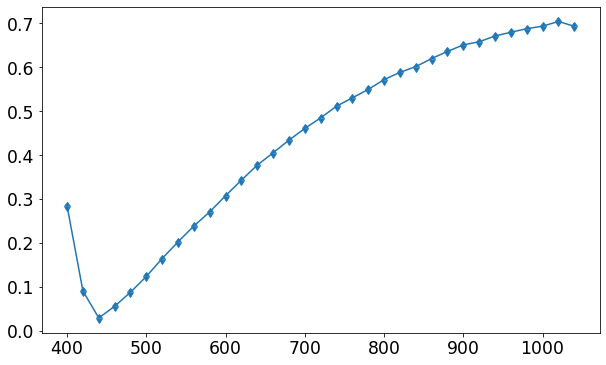

In [66]:
plt.errorbar(wl,eff,yerr=eeff,uplims=True, lolims=True)